In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt
from utils import make_submit, base_model, feature_importance

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [3]:
train_df.columns

Index(['UID', '주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
       '채무 불이행 여부'],
      dtype='object')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   주거 형태              10000 non-null  object 
 2   연간 소득              10000 non-null  float64
 3   현재 직장 근속 연수        10000 non-null  object 
 4   체납 세금 압류 횟수        10000 non-null  float64
 5   개설된 신용계좌 수         10000 non-null  int64  
 6   신용 거래 연수           10000 non-null  float64
 7   최대 신용한도            10000 non-null  float64
 8   신용 문제 발생 횟수        10000 non-null  int64  
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 10  개인 파산 횟수           10000 non-null  int64  
 11  대출 목적              10000 non-null  object 
 12  대출 상환 기간           10000 non-null  object 
 13  현재 대출 잔액           10000 non-null  float64
 14  현재 미상환 신용액         10000 non-null  float64
 15  월 상환 부채액           10000 non-null  float64
 16  신용 점수              1000

In [5]:
train_df['채무 불이행 여부'].value_counts(normalize=True)

채무 불이행 여부
0    0.6588
1    0.3412
Name: proportion, dtype: float64

In [6]:
train_df_default = train_df[train_df['채무 불이행 여부'] == 1]

In [7]:
train_df_default['주거 형태'].value_counts(normalize=True)

주거 형태
월세                  0.456917
주택 담보 대출 (거주 중)     0.324443
자가                  0.215123
주택 담보 대출 (비거주 중)    0.003517
Name: proportion, dtype: float64

In [8]:
train_df_default['주거 형태'].value_counts() / train_df['주거 형태'].value_counts()

주거 형태
월세                  0.384938
주택 담보 대출 (거주 중)     0.304707
자가                  0.327532
주택 담보 대출 (비거주 중)    0.157895
Name: count, dtype: float64

In [9]:
# 주택 담보 대출 (비거주 중) 컬럼은 피쳐에서 빼자

In [10]:
train_df_default['현재 직장 근속 연수'].value_counts(normalize=True)

현재 직장 근속 연수
10년 이상    0.321805
8년        0.121630
2년        0.088804
1년        0.082943
4년        0.070047
7년        0.066530
3년        0.060961
5년        0.058617
1년 미만     0.054513
6년        0.040739
9년        0.033411
Name: proportion, dtype: float64

In [11]:
train_df_default['현재 직장 근속 연수'].value_counts() / train_df['현재 직장 근속 연수'].value_counts()

현재 직장 근속 연수
10년 이상    0.286834
1년        0.487091
1년 미만     0.381148
2년        0.247347
3년        0.397706
4년        0.441774
5년        0.274348
6년        0.389356
7년        0.366721
8년        0.493460
9년        0.425373
Name: count, dtype: float64

In [12]:
train_df_default['대출 목적'].value_counts(normalize=True)

대출 목적
부채 통합     0.851993
기타        0.061841
주택 개보수    0.046600
사업 대출     0.013775
의료비       0.009086
여행 자금     0.008206
자동차 구매    0.003810
고액 구매     0.002345
주택 구매     0.001172
결혼 자금     0.000586
휴가 비용     0.000586
Name: proportion, dtype: float64

In [13]:
train_df_default['대출 목적'].value_counts() / train_df['대출 목적'].value_counts() 

대출 목적
결혼 자금        0.142857
고액 구매        0.117647
교육비               NaN
기타           0.217526
부채 통합        0.398547
사업 대출        0.185039
소규모 사업 자금         NaN
여행 자금        0.161850
의료비          0.196203
이사 비용             NaN
자동차 구매       0.136842
주택 개보수       0.174917
주택 구매        0.153846
휴가 비용        0.333333
Name: count, dtype: float64

In [14]:
train_df_default['대출 상환 기간'].value_counts(normalize=True)

대출 상환 기간
단기 상환    0.625147
장기 상환    0.374853
Name: proportion, dtype: float64

In [15]:
train_df_default['대출 상환 기간'].value_counts() / train_df['대출 상환 기간'].value_counts()

대출 상환 기간
단기 상환    0.305806
장기 상환    0.422810
Name: count, dtype: float64

In [16]:
# 범주형 데이터 인코딩
train_df = pd.get_dummies(train_df, columns=['주거 형태'])
test_df = pd.get_dummies(test_df, columns=['주거 형태'])

ordinal_mapping = {
    '1년 미만': 0,
    '1년': 1,
    '2년': 2,
    '3년': 3,
    '4년': 4,
    '5년': 5,
    '6년': 6,
    '7년': 7,
    '8년': 8,
    '9년': 9,
    '10년 이상': 10
}
train_df['현재 직장 근속 연수'] = train_df['현재 직장 근속 연수'].map(ordinal_mapping)
test_df['현재 직장 근속 연수'] = test_df['현재 직장 근속 연수'].map(ordinal_mapping)

train_df['대출 목적'] = train_df['대출 목적'].apply(lambda x: 1 if x == '부채 통합' else 0)
test_df['대출 목적'] = test_df['대출 목적'].apply(lambda x: 1 if x == '부채 통합' else 0)

train_df['대출 상환 기간'] = train_df['대출 상환 기간'].apply(lambda x: 0 if x == '단기 상환' else 1)
test_df['대출 상환 기간'] = test_df['대출 상환 기간'].apply(lambda x: 0 if x == '단기 상환' else 1)

#수치형 데이터
train_df['체납 세금 압류 횟수'] = train_df['체납 세금 압류 횟수'].apply(lambda x: 0 if x == 0 else 1)
test_df['체납 세금 압류 횟수'] = test_df['체납 세금 압류 횟수'].apply(lambda x: 0 if x == 0 else 1)

train_df['신용 문제 발생 횟수'] = train_df['신용 문제 발생 횟수'].apply(lambda x: 0 if x == 0 else (1 if x == 1 else 2))
test_df['신용 문제 발생 횟수'] = test_df['신용 문제 발생 횟수'].apply(lambda x: 0 if x == 0 else (1 if x == 1 else 2))  

train_df['개인 파산 횟수'] = train_df['개인 파산 횟수'].apply(lambda x: 0 if x == 0 else (1 if x == 1 else 2))
test_df['개인 파산 횟수'] = test_df['개인 파산 횟수'].apply(lambda x: 0 if x == 0 else (1 if x == 1 else 2))

In [17]:
train_df.columns

Index(['UID', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수',
       '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '대출 목적',
       '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수', '채무 불이행 여부',
       '주거 형태_월세', '주거 형태_자가', '주거 형태_주택 담보 대출 (거주 중)',
       '주거 형태_주택 담보 대출 (비거주 중)'],
      dtype='object')

In [18]:
features = ['연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수',
    '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '대출 목적',
    '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
    '주거 형태_월세', '주거 형태_자가', '주거 형태_주택 담보 대출 (거주 중)',
]
target = '채무 불이행 여부'

In [19]:
model = base_model(train_df[features], train_df[target])

Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.90      0.79      1270
           1       0.67      0.36      0.47       730

    accuracy                           0.70      2000
   macro avg       0.69      0.63      0.63      2000
weighted avg       0.69      0.70      0.67      2000



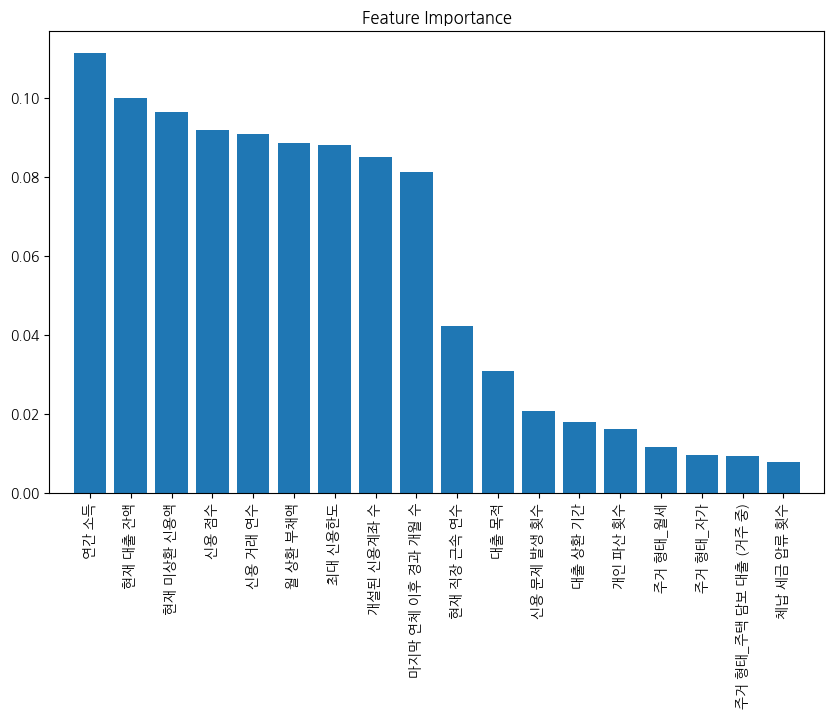

In [20]:
feature_importance(model, train_df[features])

In [22]:
make_submit(test_df, features, model)

sfs
